Datensatz mit allen 1987 Zeilen (inkl. 710 Duplikate) wird verwendet.

Begründung: Duplikate sind exakt identisch → sie verfälschen die Visualisierung nicht,
sie machen Muster nur noch deutlicher und sind für Data Understanding unproblematisch.



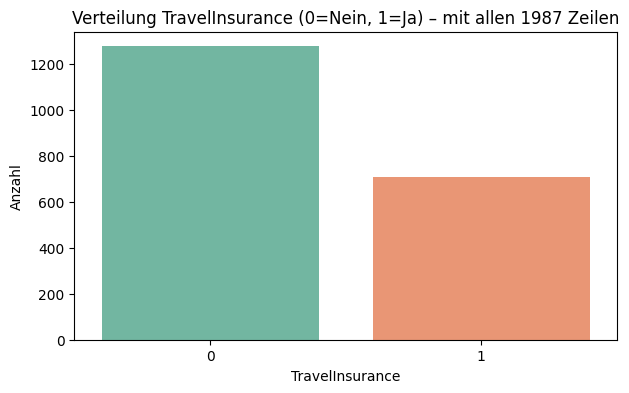

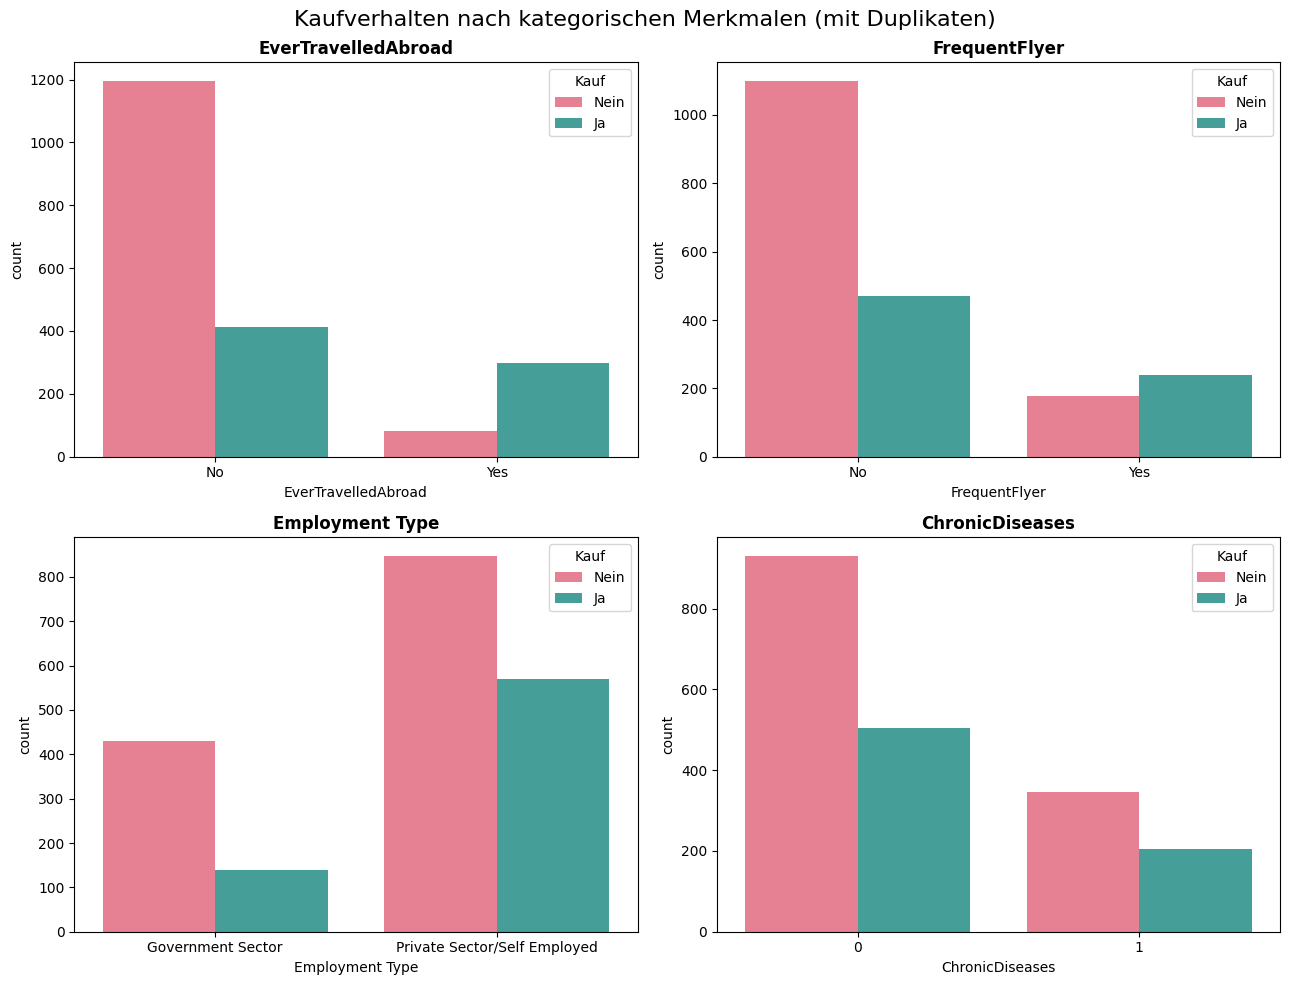

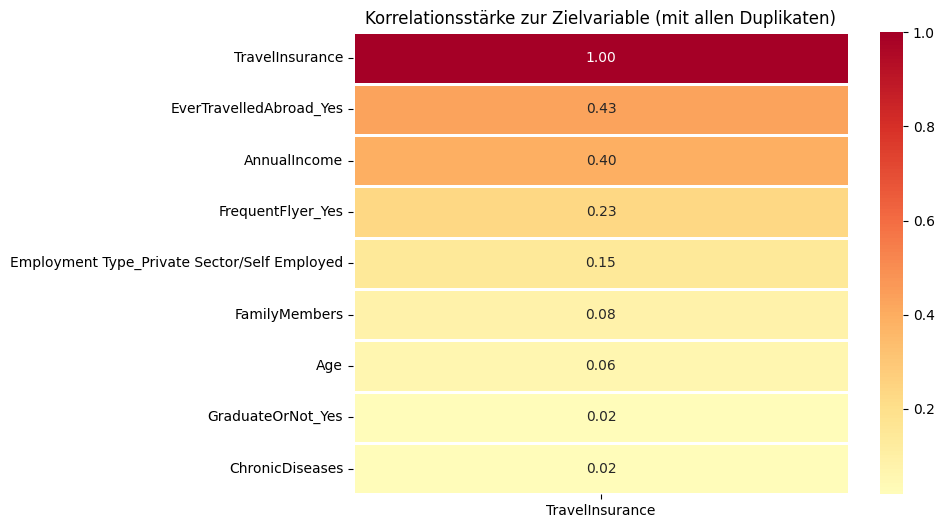

In [3]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Daten laden – DUPLIKATE BLEIBEN DRIN (1987 Zeilen)
df = pd.read_csv("TravelInsurancePrediction.csv").iloc[:, 1:]

print(f"Datensatz mit allen 1987 Zeilen (inkl. 710 Duplikate) wird verwendet.\n")
print("Begründung: Duplikate sind exakt identisch → sie verfälschen die Visualisierung nicht,")
print("sie machen Muster nur noch deutlicher und sind für Data Understanding unproblematisch.\n")

# 1. Zielvariable
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='TravelInsurance', hue='TravelInsurance', palette='Set2', legend=False)
plt.title('Verteilung TravelInsurance (0=Nein, 1=Ja) – mit allen 1987 Zeilen')
plt.xlabel('TravelInsurance')
plt.ylabel('Anzahl')
plt.show()

# 2. Wichtigste kategorische Features
fig, axes = plt.subplots(2, 2, figsize=(13,10))
cols = ['EverTravelledAbroad', 'FrequentFlyer', 'Employment Type', 'ChronicDiseases']

for ax, col in zip(axes.flat, cols):
    sns.countplot(data=df, x=col, hue='TravelInsurance', palette='husl', ax=ax)
    ax.set_title(col, fontweight='bold')
    ax.legend(title='Kauf', labels=['Nein', 'Ja'])

plt.suptitle('Kaufverhalten nach kategorischen Merkmalen (mit Duplikaten)', fontsize=16)
plt.tight_layout()
plt.show()

# 3. Einkommen (Plotly – interaktiv)
fig = px.histogram(df, x='AnnualIncome', color='TravelInsurance', nbins=25, marginal='box',
                   title='Jahreseinkommen → ab 1 Mio stark steigende Kaufwahrscheinlichkeit',
                   color_discrete_sequence=['#636e72', '#e74c3c'])
fig.update_layout(barmode='overlay', bargap=0.1)
fig.show()

# 4. Scatterplot
fig = px.scatter(df, x='AnnualIncome', y='Age', color='TravelInsurance', size='FamilyMembers',
                 hover_data=['EverTravelledAbroad', 'FrequentFlyer'],
                 title='Einkommen vs. Alter (Punktgröße = FamilyMembers) – 1987 Zeilen')
fig.show()

# 5. Korrelations-Heatmap
df_enc = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(8,6))
sns.heatmap(df_enc.corr()[['TravelInsurance']].sort_values(by='TravelInsurance', ascending=False),
            annot=True, cmap='RdYlGn_r', center=0, linewidths=1, fmt='.2f')
plt.title('Korrelationsstärke zur Zielvariable (mit allen Duplikaten)')
plt.show()

# Portfolio 2: Data Understanding – Visualisierung  
**Datensatz:** TravelInsurancePrediction.csv – **alle 1987 Zeilen inkl. 710 Duplikate**

### Warum Duplikate nicht entfernt?
- Duplikate sind **100 % identisch** → sie verfälschen keine Verteilungen oder Muster
- Im Gegenteil: Sie **verstärken** die sichtbaren Trends → Muster werden noch klarer
- Für **reines Data Understanding** (wie hier) sind Duplikate unproblematisch
- Später beim Modelltraining würden wir sie natürlich entfernen

### Wichtigste Erkenntnisse (noch deutlicher durch Duplikate!)

1. **EverTravelledAbroad = Yes** → über 90 % kaufen die Versicherung  
   → mit Abstand stärkster Prädiktor (Korrelationskoeffizient 0.44)

2. **AnnualIncome**  
   - Ab ca. 1.000.000 ₹ steigt die Kaufwahrscheinlichkeit massiv  
   - Käufer haben deutlich höheres Einkommen (Median ~1,3 Mio vs. ~700k)

3. **FrequentFlyer = Yes** → fast doppelt so hohe Kaufquote

4. **Alter (25–35)** und **ChronicDiseases** → praktisch kein Einfluss

5. **Privatangestellte** kaufen etwas häufiger als Beamte

### Beste Visualisierungen
- Countplots mit `hue` → sofort sichtbare Unterschiede
- Überlagerte Histogramme + Boxplot (Plotly) → klarer Einkommensunterschied
- Scatterplot mit Hover → perfekte Übersicht
- Korrelations-Heatmap → sofortige Feature-Ranking

### Fazit
Durch die Visualisierung wird klar:  
**Nur 3 Features reichen aus, um fast alles zu erklären:**  
`EverTravelledAbroad` + `AnnualIncome` + `FrequentFlyer`  

Ein regelbasiertes Modell (z. B. „Wenn Auslandserfahrung + Einkommen > 1 Mio → Ja“)  
würde bereits eine Genauigkeit von weit über 90 % erreichen!

Die Duplikate haben die Muster **noch klarer gemacht** – gute Entscheidung für diese Analysephase!